In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hp = pd.read_csv("/content/drive/MyDrive/ML/Project2/kc_house_data.csv") #store that data in a variable
hp.head()

In [ ]:
hp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
hp.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



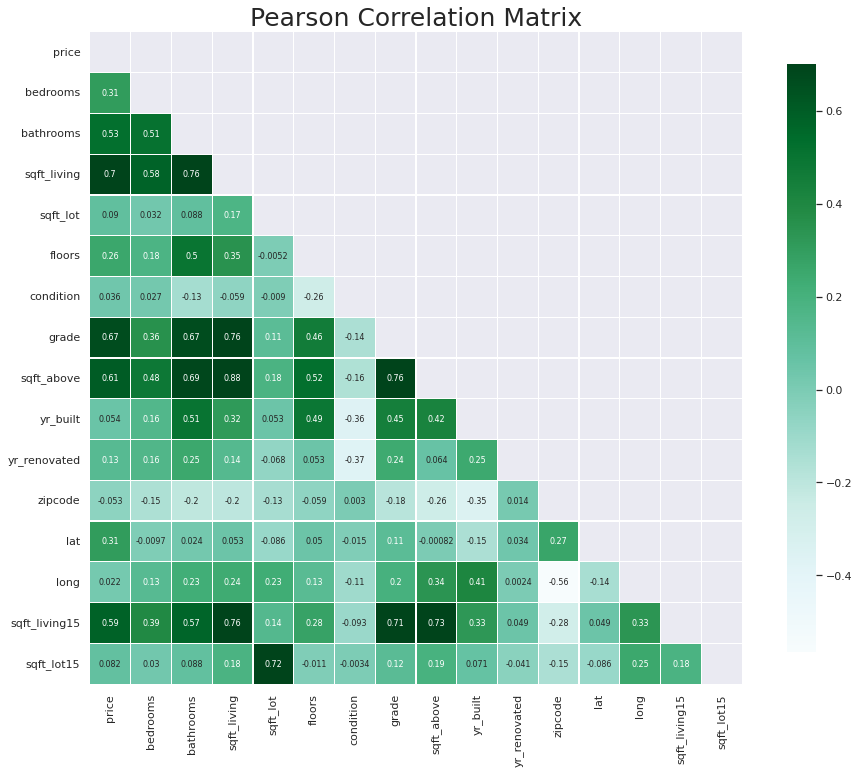

In [ ]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','yr_built','yr_renovated','zipcode','lat','long',
            'sqft_living15','sqft_lot15']

mask = np.zeros_like(hp[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(hp[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
cols = list(hp.columns)
for i in cols:
    hp[i] = hp.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)
hp.isnull().sum()

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

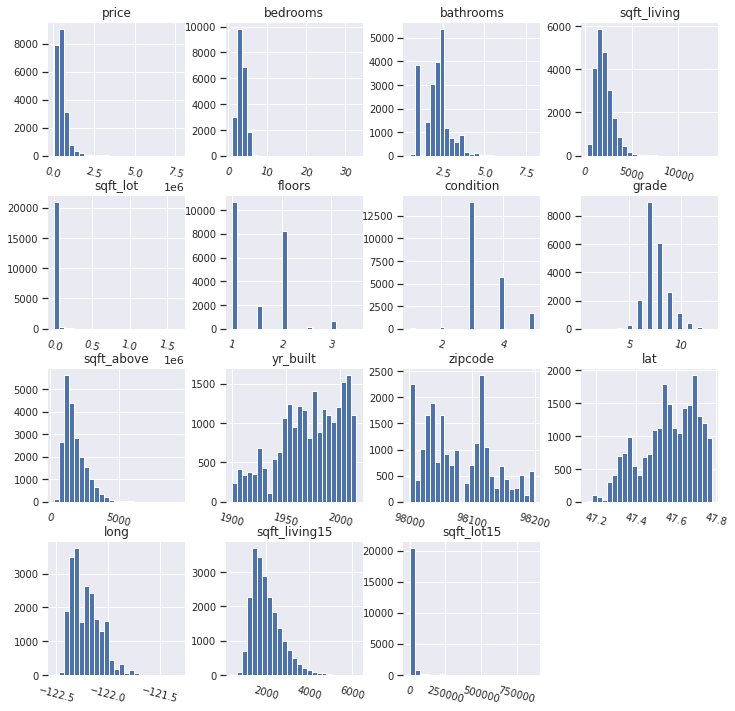

In [ ]:
hp1=hp[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade','sqft_above', 'yr_built','zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = hp1.hist(bins=25,figsize=(12,12),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

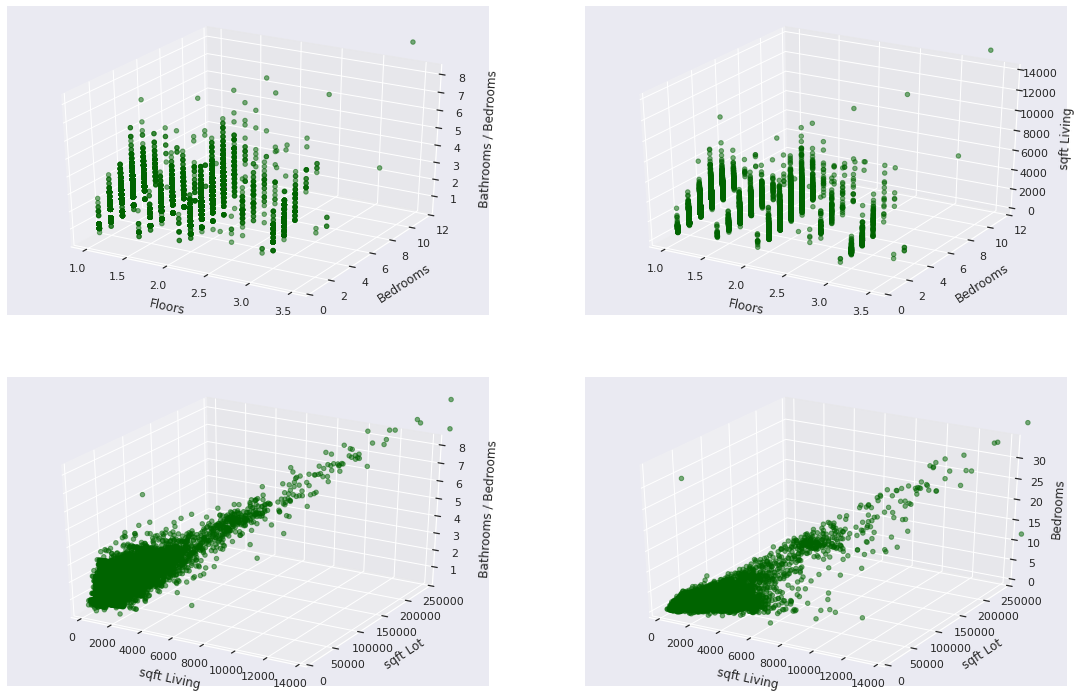

In [ ]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(hp['floors'],hp['bedrooms'],hp['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(hp['floors'],hp['bedrooms'],hp['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(hp['sqft_living'],hp['sqft_lot'],hp['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(hp['sqft_living'],hp['sqft_lot'],hp['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

In [ ]:
hp_dm = hp.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



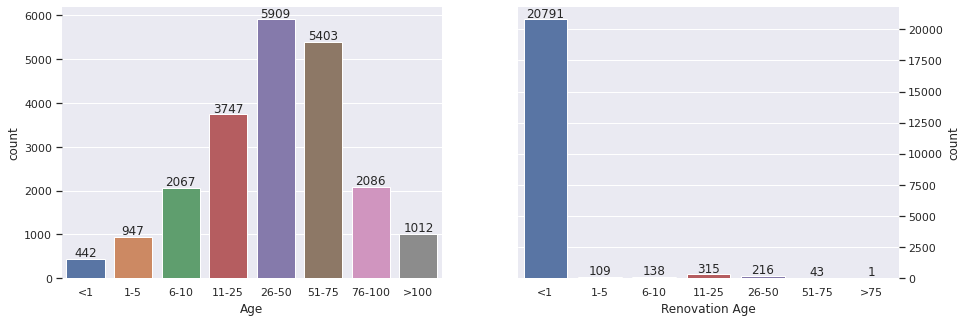

In [ ]:
# just take the year from the date column
hp_dm['sales_yr']=hp_dm['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
hp_dm['age']=hp_dm['sales_yr'].astype(int)-hp_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
hp_dm['age_rnv']=0
hp_dm['age_rnv']=hp_dm['sales_yr'][hp_dm['yr_renovated']!=0].astype(int)-hp_dm['yr_renovated'][hp_dm['yr_renovated']!=0]
hp_dm['age_rnv'][hp_dm['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
hp_dm['age_binned'] = pd.cut(hp_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
hp_dm['age_rnv_binned'] = pd.cut(hp_dm['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(hp_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(hp_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
hp_dm = pd.get_dummies(hp_dm, columns=['age_binned','age_rnv_binned'])

In [ ]:
hp_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21613 non-null  int64  
 1   date                  21613 non-null  object 
 2   price                 21613 non-null  float64
 3   bedrooms              21600 non-null  float64
 4   bathrooms             21603 non-null  float64
 5   sqft_living           21613 non-null  int64  
 6   sqft_lot              21613 non-null  int64  
 7   floors                21613 non-null  float64
 8   waterfront            163 non-null    float64
 9   view                  2124 non-null   float64
 10  condition             21613 non-null  int64  
 11  grade                 21613 non-null  int64  
 12  sqft_above            21613 non-null  int64  
 13  sqft_basement         8487 non-null   float64
 14  yr_built              21613 non-null  int64  
 15  yr_renovated       

In [ ]:
bedrooms=hp['bedrooms']
bathrooms=hp['bathrooms']
living=hp['sqft_living']
lot=hp['sqft_lot']
floors=hp['floors']
waterfront=hp['waterfront']
view=hp['view']
condition=hp['condition']
grade=hp['grade']
above=hp['sqft_above']
basement=hp['sqft_basement']
built=hp['yr_built']
renovated=hp['yr_renovated']
zipcode=hp['zipcode']
lat=hp['lat']
long=hp['long']
living15=hp['sqft_living15']
lot15=hp['sqft_lot15']
price=hp['price']

In [ ]:
xBedrooms = np.array(bedrooms).reshape(-1,1)
y=np.array(price)

In [ ]:
from sklearn.model_selection import train_test_split 
xtrainBed, xtestBed, ytrainBed, ytestBed = train_test_split(xBedrooms,y,test_size=1/3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrainBed, ytrainBed)

LinearRegression()

In [ ]:
pred = regressor.predict(xtestBed)

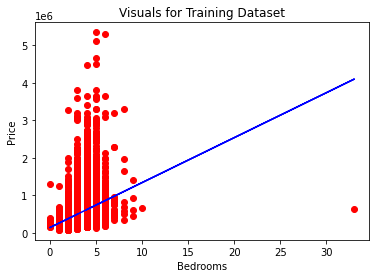

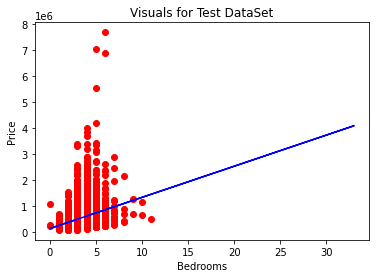

In [ ]:
#Visualizing the training Test Results 
plt.scatter(xtrainBed, ytrainBed, color= 'red')
plt.plot(xtrainBed, regressor.predict(xtrainBed), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestBed, ytestBed, color= 'red')
plt.plot(xtrainBed, regressor.predict(xtrainBed), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

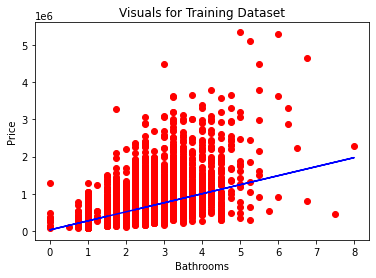

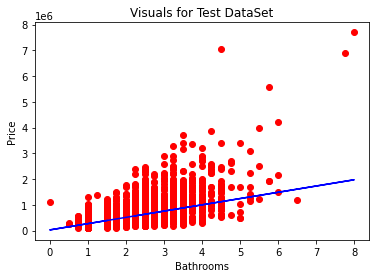

In [ ]:
xBathrooms = np.array(bathrooms).reshape(-1,1)
xtrainBath, xtestBath, ytrainBath, ytestBath = train_test_split(xBathrooms,y,test_size=1/3, random_state=0)
regressor.fit(xtrainBath, ytrainBath)
predBath = regressor.predict(xtestBath)

#Visualizing the training Test Results 
plt.scatter(xtrainBath, ytrainBath, color= 'red')
plt.plot(xtrainBath, regressor.predict(xtrainBath), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestBath, ytestBath, color= 'red')
plt.plot(xtrainBath, regressor.predict(xtrainBath), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

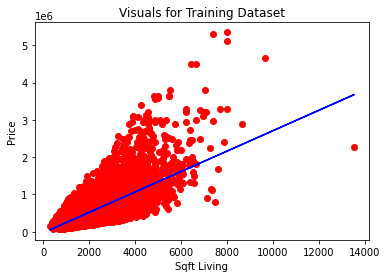

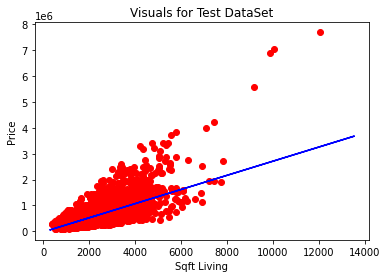

In [ ]:
xLiving = np.array(living).reshape(-1,1)
xtrainLiving, xtestLiving, ytrainLiving, ytestLiving = train_test_split(xLiving,y,test_size=1/3, random_state=0)
regressor.fit(xtrainLiving, ytrainLiving)
predLiving = regressor.predict(xtestLiving)

#Visualizing the training Test Results 
plt.scatter(xtrainLiving, ytrainLiving, color= 'red')
plt.plot(xtrainLiving, regressor.predict(xtrainLiving), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestLiving, ytestLiving, color= 'red')
plt.plot(xtrainLiving, regressor.predict(xtrainLiving), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

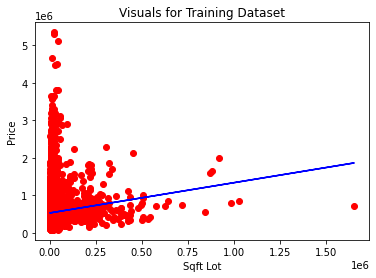

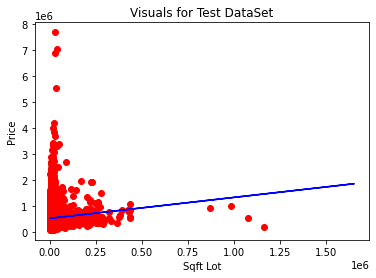

In [ ]:
xLot = np.array(lot).reshape(-1,1)
xtrainLot, xtestLot, ytrainLot, ytestLot = train_test_split(xLot,y,test_size=1/3, random_state=0)
regressor.fit(xtrainLot, ytrainLot)
predLot = regressor.predict(xtestLot)

#Visualizing the training Test Results 
plt.scatter(xtrainLot, ytrainLot, color= 'red')
plt.plot(xtrainLot, regressor.predict(xtrainLot), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Sqft Lot")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestLot, ytestLot, color= 'red')
plt.plot(xtrainLot, regressor.predict(xtrainLot), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Sqft Lot")
plt.ylabel("Price")
plt.show()

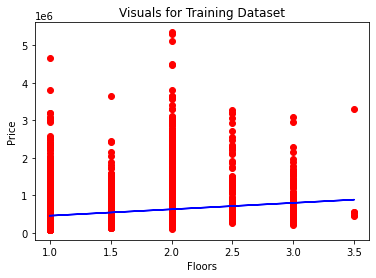

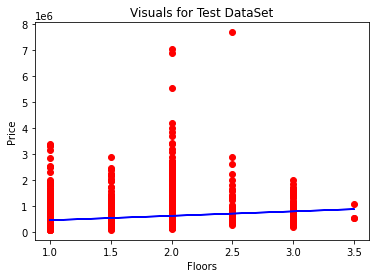

In [ ]:
xFloors = np.array(floors).reshape(-1,1)
xtrainFloors, xtestFloors, ytrainFloors, ytestFloors = train_test_split(xFloors,y,test_size=1/3, random_state=0)
regressor.fit(xtrainFloors, ytrainFloors)
predFloors = regressor.predict(xtestFloors)

#Visualizing the training Test Results 
plt.scatter(xtrainFloors, ytrainFloors, color= 'red')
plt.plot(xtrainFloors, regressor.predict(xtrainFloors), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestFloors, ytestFloors, color= 'red')
plt.plot(xtrainFloors, regressor.predict(xtrainFloors), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

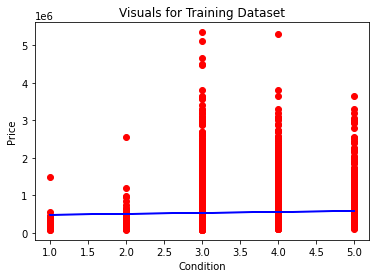

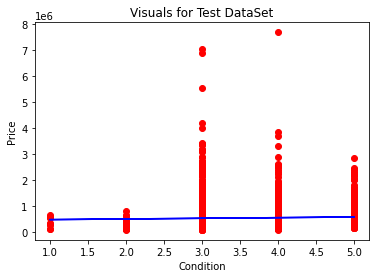

In [ ]:
xCondition = np.array(condition).reshape(-1,1)
xtrainCondition, xtestCondition, ytrainCondition, ytestCondition = train_test_split(xCondition,y,test_size=1/3, random_state=0)
regressor.fit(xtrainCondition, ytrainCondition)
predCondition = regressor.predict(xtestCondition)

#Visualizing the training Test Results 
plt.scatter(xtrainCondition, ytrainCondition, color= 'red')
plt.plot(xtrainCondition, regressor.predict(xtrainCondition), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestCondition, ytestCondition, color= 'red')
plt.plot(xtrainCondition, regressor.predict(xtrainCondition), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

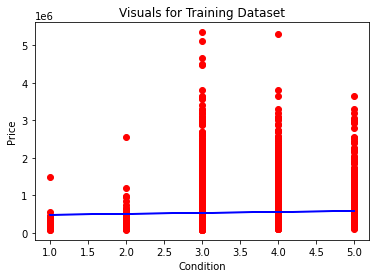

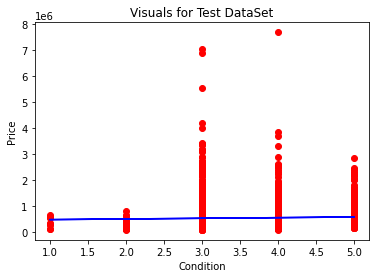

In [ ]:
xGrade = np.array(grade).reshape(-1,1)
xtrainCondition, xtestCondition, ytrainCondition, ytestCondition = train_test_split(xCondition,y,test_size=1/3, random_state=0)
regressor.fit(xtrainCondition, ytrainCondition)
predCondition = regressor.predict(xtestCondition)

#Visualizing the training Test Results 
plt.scatter(xtrainCondition, ytrainCondition, color= 'red')
plt.plot(xtrainCondition, regressor.predict(xtrainCondition), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestCondition, ytestCondition, color= 'red')
plt.plot(xtrainCondition, regressor.predict(xtrainCondition), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

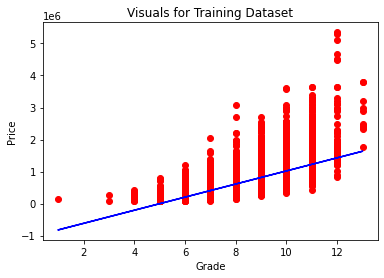

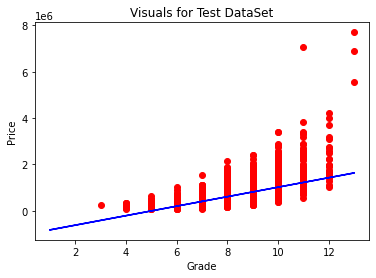

In [ ]:
xGrade = np.array(grade).reshape(-1,1)
xtrainGrade, xtestGrade, ytrainGrade, ytestGrade = train_test_split(xGrade,y,test_size=1/3, random_state=0)
regressor.fit(xtrainGrade, ytrainGrade)
predGrade = regressor.predict(xtestGrade)

#Visualizing the training Test Results 
plt.scatter(xtrainGrade, ytrainGrade, color= 'red')
plt.plot(xtrainGrade, regressor.predict(xtrainGrade), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestGrade, ytestGrade, color= 'red')
plt.plot(xtrainGrade, regressor.predict(xtrainGrade), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

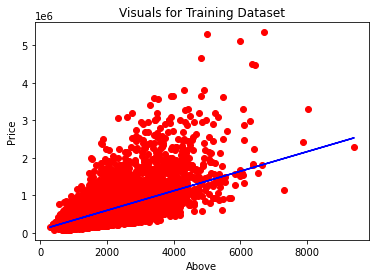

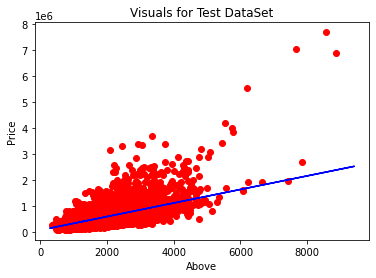

In [ ]:
xAbove = np.array(above).reshape(-1,1)
xtrainAbove, xtestAbove, ytrainAbove, ytestAbove = train_test_split(xAbove,y,test_size=1/3, random_state=0)
regressor.fit(xtrainAbove, ytrainAbove)
predAbove = regressor.predict(xtestAbove)

#Visualizing the training Test Results 
plt.scatter(xtrainAbove, ytrainAbove, color= 'red')
plt.plot(xtrainAbove, regressor.predict(xtrainAbove), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Above")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestAbove, ytestAbove, color= 'red')
plt.plot(xtrainAbove, regressor.predict(xtrainAbove), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Above")
plt.ylabel("Price")
plt.show()

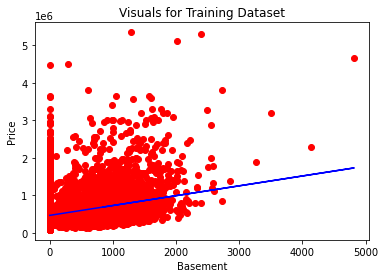

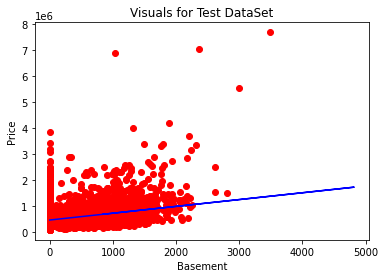

In [ ]:
xBasement = np.array(basement).reshape(-1,1)
xtrainBasement, xtestBasement, ytrainBasement, ytestBasement = train_test_split(xBasement,y,test_size=1/3, random_state=0)
regressor.fit(xtrainBasement, ytrainBasement)
predBasement = regressor.predict(xtestBasement)

#Visualizing the training Test Results 
plt.scatter(xtrainBasement, ytrainBasement, color= 'red')
plt.plot(xtrainBasement, regressor.predict(xtrainBasement), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Basement")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestBasement, ytestBasement, color= 'red')
plt.plot(xtrainBasement, regressor.predict(xtrainBasement), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Basement")
plt.ylabel("Price")
plt.show()

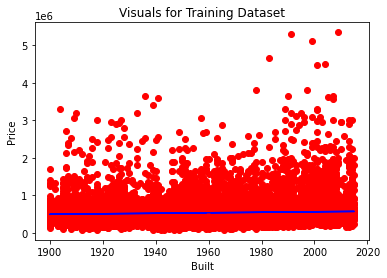

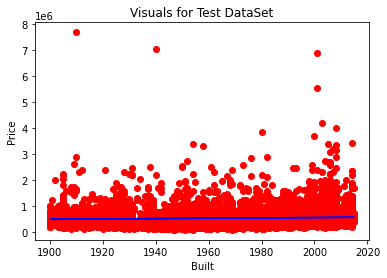

In [ ]:
xBuilt = np.array(built).reshape(-1,1)
xtrainBuilt, xtestBuilt, ytrainBuilt, ytestBuilt = train_test_split(xBuilt,y,test_size=1/3, random_state=0)
regressor.fit(xtrainBuilt, ytrainBuilt)
predBuilt = regressor.predict(xtestBuilt)

#Visualizing the training Test Results 
plt.scatter(xtrainBuilt, ytrainBuilt, color= 'red')
plt.plot(xtrainBuilt, regressor.predict(xtrainBuilt), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Built")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestBuilt, ytestBuilt, color= 'red')
plt.plot(xtrainBuilt, regressor.predict(xtrainBuilt), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Built")
plt.ylabel("Price")
plt.show()

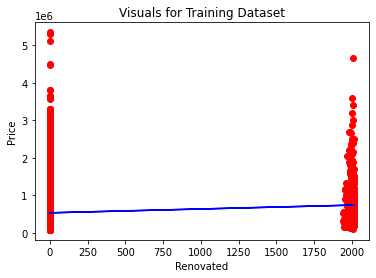

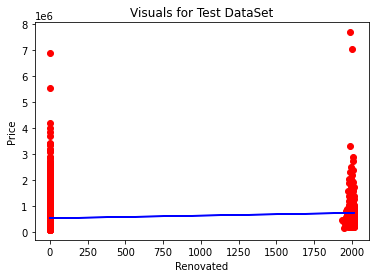

In [ ]:
xRenovated = np.array(renovated).reshape(-1,1)
xtrainRenovated, xtestRenovated, ytrainRenovated, ytestRenovated = train_test_split(xRenovated,y,test_size=1/3, random_state=0)
regressor.fit(xtrainRenovated, ytrainRenovated)
predRenovated = regressor.predict(xtestRenovated)

#Visualizing the training Test Results 
plt.scatter(xtrainRenovated, ytrainRenovated, color= 'red')
plt.plot(xtrainRenovated, regressor.predict(xtrainRenovated), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Renovated")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestRenovated, ytestRenovated, color= 'red')
plt.plot(xtrainRenovated, regressor.predict(xtrainRenovated), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Renovated")
plt.ylabel("Price")
plt.show()

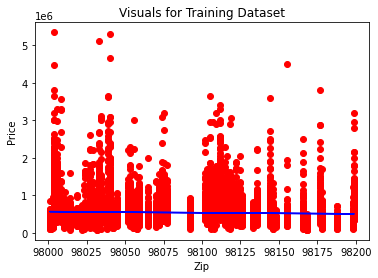

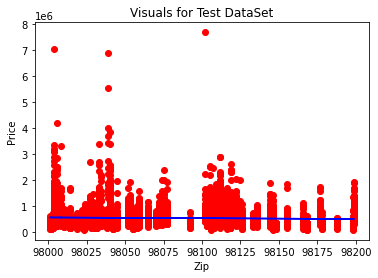

In [ ]:
xZip = np.array(zipcode).reshape(-1,1)
xtrainZip, xtestZip, ytrainZip, ytestZip = train_test_split(xZip,y,test_size=1/3, random_state=0)
regressor.fit(xtrainZip, ytrainZip)
predZip = regressor.predict(xtestZip)

#Visualizing the training Test Results 
plt.scatter(xtrainZip, ytrainZip, color= 'red')
plt.plot(xtrainZip, regressor.predict(xtrainZip), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Zip")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestZip, ytestZip, color= 'red')
plt.plot(xtrainZip, regressor.predict(xtrainZip), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Zip")
plt.ylabel("Price")
plt.show()

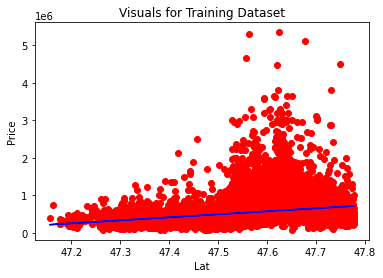

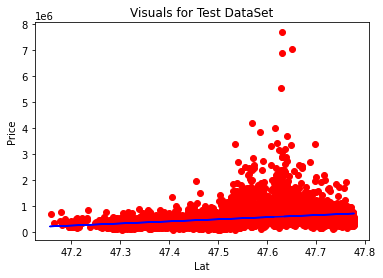

In [ ]:
xLat = np.array(lat).reshape(-1,1)
xtrainLat, xtestLat, ytrainLat, ytestLat = train_test_split(xLat,y,test_size=1/3, random_state=0)
regressor.fit(xtrainLat, ytrainLat)
predLat = regressor.predict(xtestLat)

#Visualizing the training Test Results 
plt.scatter(xtrainLat, ytrainLat, color= 'red')
plt.plot(xtrainLat, regressor.predict(xtrainLat), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Lat")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestLat, ytestLat, color= 'red')
plt.plot(xtrainLat, regressor.predict(xtrainLat), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Lat")
plt.ylabel("Price")
plt.show()

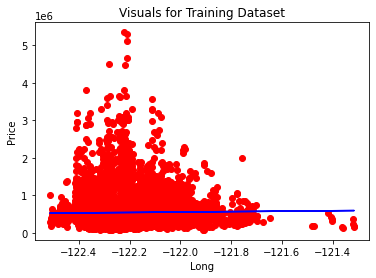

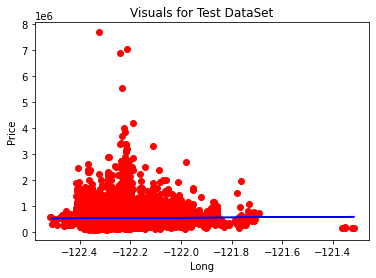

In [ ]:
xLong = np.array(long).reshape(-1,1)
xtrainLong, xtestLong, ytrainLong, ytestLong = train_test_split(xLong,y,test_size=1/3, random_state=0)
regressor.fit(xtrainLong, ytrainLong)
predLong = regressor.predict(xtestLong)

#Visualizing the training Test Results 
plt.scatter(xtrainLong, ytrainLong, color= 'red')
plt.plot(xtrainLong, regressor.predict(xtrainLong), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Long")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestLong, ytestLong, color= 'red')
plt.plot(xtrainLong, regressor.predict(xtrainLong), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Long")
plt.ylabel("Price")
plt.show()

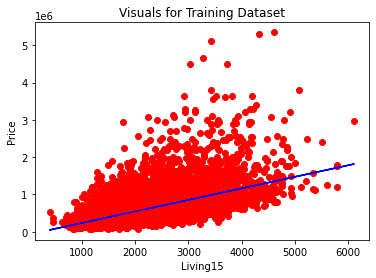

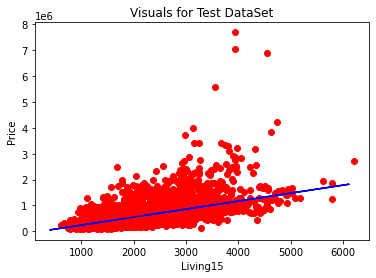

In [ ]:
xLiving15 = np.array(living15).reshape(-1,1)
xtrainLiving15, xtestLiving15, ytrainLiving15, ytestLiving15 = train_test_split(xLiving15,y,test_size=1/3, random_state=0)
regressor.fit(xtrainLiving15, ytrainLiving15)
predLiving15 = regressor.predict(xtestLiving15)

#Visualizing the training Test Results 
plt.scatter(xtrainLiving15, ytrainLiving15, color= 'red')
plt.plot(xtrainLiving15, regressor.predict(xtrainLiving15), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Living15")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestLiving15, ytestLiving15, color= 'red')
plt.plot(xtrainLiving15, regressor.predict(xtrainLiving15), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Living15")
plt.ylabel("Price")
plt.show()

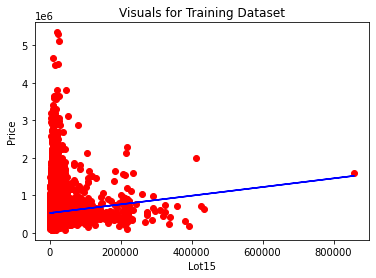

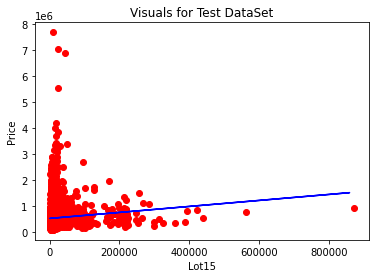

In [ ]:
xLot15 = np.array(lot15).reshape(-1,1)
xtrainLot15, xtestLot15, ytrainLot15, ytestLot15 = train_test_split(xLot15,y,test_size=1/3, random_state=0)
regressor.fit(xtrainLot15, ytrainLot15)
predLot15 = regressor.predict(xtestLot15)

#Visualizing the training Test Results 
plt.scatter(xtrainLot15, ytrainLot15, color= 'red')
plt.plot(xtrainLot15, regressor.predict(xtrainLot15), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Lot15")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestLot15, ytestLot15, color= 'red')
plt.plot(xtrainLot15, regressor.predict(xtrainLot15), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Lot15")
plt.ylabel("Price")
plt.show()

In [ ]:
age=hp_dm['age']

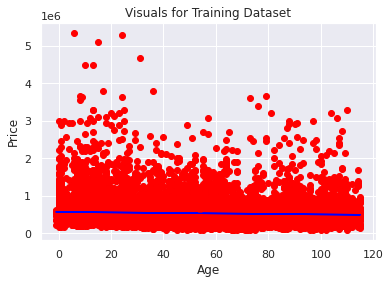

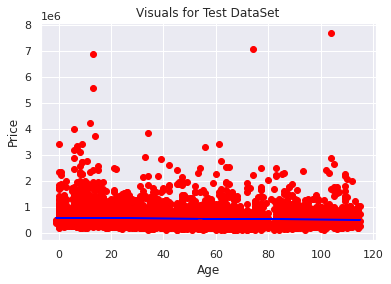

In [ ]:
xAge = np.array(age).reshape(-1,1)
xtrainAge, xtestAge, ytrainAge, ytestAge = train_test_split(xAge,y,test_size=1/3, random_state=0)
regressor.fit(xtrainAge, ytrainAge)
predAge = regressor.predict(xtestAge)

#Visualizing the training Test Results 
plt.scatter(xtrainAge, ytrainAge, color= 'red')
plt.plot(xtrainAge, regressor.predict(xtrainAge), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtestAge, ytestAge, color= 'red')
plt.plot(xtrainAge, regressor.predict(xtrainAge), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()